#### Support Vector Machines
##Implement SVM from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Create linearly separable data and 


In [2]:
#Random data generation
def data_generator(data_p):
    data = [[np.random.rand(), np.random.rand()] for i in range(data_p)]
    for i, point in enumerate(data):
        x, y = point
        if 0.5*x - y + 0.25 > 0:
            data[i].append(-1)
        else:
            data[i].append(1)
    return data
data = data_generator(10)

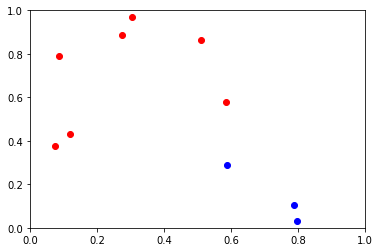

In [3]:
#visualization
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)


#SVM Classifier
Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. 
You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.

In [4]:
def svm_function(x, y, epoch,lambd):#lamd is the learning rate
    w=np.zeros((1,3))
    
    for i in range(epoch):
        l_rate=1/(lambd*(i+1))
        for j in range(len(y)):
            if (y[j]*np.dot(w,x[j].T))<=1:
                w=w*(1-1/(i+1))+l_rate*y[j]*x[j];
            else:
                w=w*(1-1/(i+1))
                
    return w

#Run SVM Classifier

In [5]:
def svm_train(lambd, epoch, no_data):
    
    data = np.asarray(data_generator(no_data))
    X = data[:,:2]
    Y = data[:,2]
    a=np.ones((1,len(data)))
    X=np.concatenate((a.T,X),axis=1)
    
    w = svm_function(X, Y, epoch,lambd)
    return w
w=svm_train(0.3, 1000, 10)
print(w)


[[ 0.00333667 -0.70763277  0.48240479]]


#Visualize the classifier
Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated
(0.5*x - y + 0.25). 

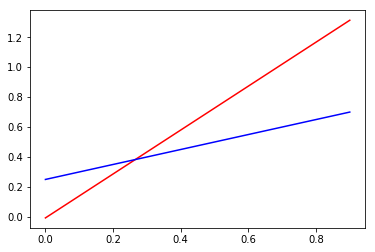

In [6]:
x=np.arange(0,1,0.1)
plt.plot(x,-w[0,0]/w[0,2]-(w[0,1]/w[0,2])*x,'r-',x,0.5*x+0.25,'b-')
plt.show()

Increase the number of data-points and observe number of epochs to converge. Draw plots showing data-points, actual data seprating line and line corrosponding to 'w' you got from svm_function for 10, 20, 30, 40, 50 and 100 data-points. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

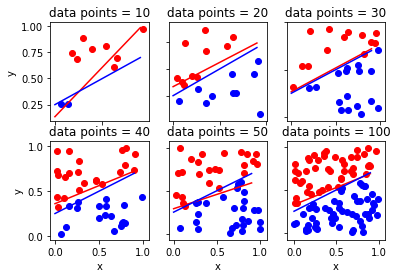

In [7]:
data_pts = [10, 20, 30, 40 ,50, 100]

#setting up the subplot in order to plot for various data_points 
f,b = plt.subplots(2, 3)
epoch = 5000
def data_vis(data2, w, a, ndp):
    if a<=2:
        n1 = 5%(5-a)
    else:
        n1 = 5%(8-a)
    if a<=2:
        n2 = 0
    else:
        n2 = 1
    for x, y, l in data2:
        if l == 1: 
            clr = 'red'
        else: 
            clr = 'blue'
        b[n2,n1].scatter(x, y, c=clr)
    x= np.arange(0,1, 0.1)
    b[n2,n1].plot(x, -w[0][1]/w[0][2]*x -w[0][0]/w[0][2], 'r-', x, 0.5*x + 0.25 , 'b-')    
    b[n2,n1].set_title('data points = ' + str(ndp))
           
set_of_lambd = [0.010, 0.010, 0.02, 0.020, 0.025, 0.010]

for l, ndp in (enumerate(data_pts)):
    w = svm_train(set_of_lambd[l], epoch, ndp)
    data1 = data_generator(ndp)
    data_vis(data1, w, l, ndp)

for c in b.flat:
    c.set(xlabel='x', ylabel='y')

for c in b.flat:
    c.label_outer()   
    

#Perturbing the previously created  data
Add noise to the data and visualize the resulting classifier.




In [8]:
for i in range(len(data)):
    data[i][0] += (np.random.rand() - 0.5) / 2.
    data[i][1] += (np.random.rand() - 0.5) / 2.

#Visualizing the perturbed Data

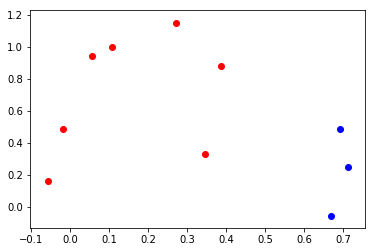

In [9]:
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    

#Visualize the classifier trained on noisy data
Plot actual seperating line and seperating line you got from svm_classifier. Do this for 10, 20, 30, 40, 50 and 100 data points. You can vary the scale of noise as well. Please use only one notebook cell for this visualization. Please use subplot function in matplotlib for this.

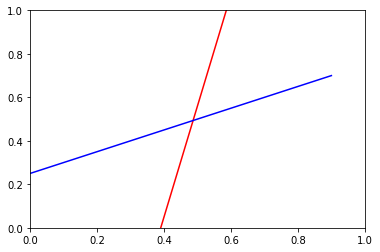

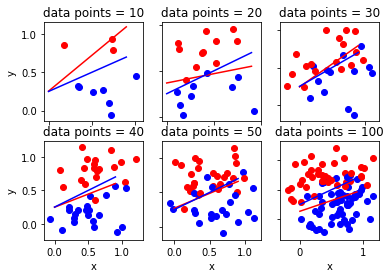

In [10]:
#first doing it for previously generated 10 data points
#this is the same data set that was used earlier


data= np.asarray(data)
for i in range(len(data)):
    data[i][0] += (np.random.rand() - 0.5) / 2.
    data[i][1] += (np.random.rand() - 0.5) / 2.

X = data[:,:2]
Y = data[:,2]
a=np.ones((1,len(data)))
X=np.concatenate((a.T,X),axis=1)
w = svm_function(X, Y, 1000, 0.01)
z = np.arange(0., 1., 0.1)
plt.plot(z, -w[0][1]/w[0][2]*z -w[0][0]/w[0][2], 'r-', z, 0.5*z + 0.25 , 'b-')
plt.axis([0, 1, 0, 1])
plt.show()

#checking with more no of data points
#observation of convergence

data_pts = [10, 20, 30, 40 ,50, 100]#no of data points

#setting up the sub_plotting figure

f, b = plt.subplots(2, 3)
epoch = 5000
def data_vis(data, w, a, ndp):
    if a<=2:
        n1 = 5%(5-a)
    else:
        n1 = 5%(8-a)
    if a<=2:
        n2 = 0
    else:
        n2 = 1
        
        
    #coloring and visualization 
    
    
    for x, y, l in data:
        if l == 1: 
            clr = 'red'
        else: 
            clr = 'blue'
        b[n2,n1].scatter(x, y, c=clr)
    x= np.arange(0,1, 0.1)
    b[n2,n1].plot(x, -w[0][1]/w[0][2]*x -w[0][0]/w[0][2], 'r-', x, 0.5*x + 0.25 , 'b-')    
    b[n2,n1].set_title('data points = ' + str(ndp))
    
#set of lambda is here for various learning rate for various set


set_of_lambd = [0.02, 0.02, 0.02, 0.03, 0.03, 0.03]
for i, j in (enumerate(data_pts)):
    w = svm_train(set_of_lambd[i], epoch, j)
    data = data_generator(j)
    
    
    #add noise to the generated data

    for t in range(len(data)):
        data[t][0] += (np.random.rand() - 0.5) / 2.
        data[t][1] += (np.random.rand() - 0.5) / 2.
    data_vis(data, w, i, j)
    
    
for c in b.flat:
    c.set(xlabel='x', ylabel='y')
for c in b.flat:
    c.label_outer()
           


#Read the Random Non-linear data stored in CSV1 and visualize it

[[ 0.46475621 -0.29946254  1.        ]
 [-0.6703581   0.99434624 -1.        ]
 [ 0.71215691  0.81516674 -1.        ]
 [ 0.64035008 -0.36347882 -1.        ]
 [-0.65605233 -0.39266538 -1.        ]
 [ 0.62836818 -0.34037401 -1.        ]
 [-0.86231806 -0.63820477 -1.        ]
 [-0.92656277  0.10902035 -1.        ]
 [-0.18054607  0.70682425 -1.        ]
 [-0.17578842 -0.17438402  1.        ]]


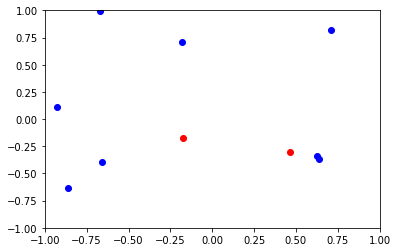

In [11]:
#Reading of data
fpath_csv1 = 'C:/Users/SAYAN/Desktop/ML1/csv1.csv'

#Reading the file
with open(fpath_csv1, 'r') as m:
    data1_read = m.read()
train_list1 = []
for i in data1_read.strip().split('\n'):
    j = i.split(',')
    train_list1.append(j)
data_csv1 = np.array(train_list1,dtype=np.float)
print(data_csv1)


#Visualisation of data
for x, y, l in data_csv1:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(-1,1)
    plt.ylim(-1,1)

#Train a SVM classifier on the linearly non-separable data by appropriate features crafted from input data
For linearly non-separable data, you need to transform the data in a space where it can be linearly seprable. These features can be exponential, polynomial, trignometric or any other function of actual input features. For example, if your input data is (x1, x2) you can have hand-crafted features as (sin(x1), cos(x1), cos(x2), x1-x2). 
Here you need to think of which hand-crafted features can be best suited for data given to you. Write a function to convert input features to hand-crafted features. Use these features to train a SVM using svm_function.
Note that, if you choose to have L hand-crafted features, SVM will return L+1 dimensional 'w'. 


In [12]:
#creating feature extraction function

def feature_extract1(in_data):
    dat_extrac = in_data.copy()
    for i in range(len(dat_extrac)):
        dat_extrac[i][0] = np.square(dat_extrac[i][0])
    return dat_extrac

#extract feature from csv1 dataset
data1_ex = feature_extract1(data_csv1)
data1_ex1 = np.concatenate((np.ones((data1_ex.shape[0],1)),data1_ex),axis=1)
X = data1_ex1[:,0:3]
Y = data1_ex1[:,3]

#finding out the separation vector(classification)
w = svm_function(X, Y, 5000, 0.001)
print("w is as follows:",w)

w is as follows: [[  2.21764343 -12.36777201  -4.15908765]]


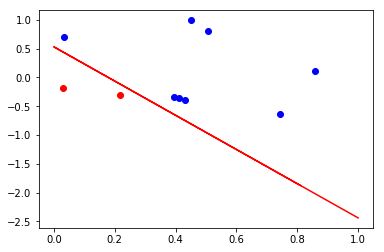

In [13]:
for x, y, l in data1_ex:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
z = np.arange(-1, 1, 0.1)
z = np.square(z)
plt.plot(z, -w[0,0]/w[0,2]-(w[0,1]/w[0,2])*z, 'r-')   
plt.show()

#Visualize decision boundary
Here, as 'w' retuened by svm_function is (L+1) dimensional, you can not visualize it in the form of line in 2D. To visualize non-linear decision boundary in 2D, you can generate few hundred random data-points and can observe if classifier labels them +1 or -1. Then you can plot this points with different colors to get emperical decision boundary. Write the code for visualization of non-linear decision boundary in next cell.

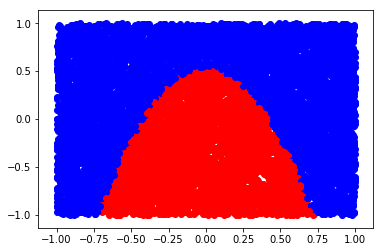

In [14]:
#Data visualization
#create random data points first
random_data = np.array([[-1+2*np.random.rand(), -1+2*np.random.rand()] for i in range(10000)])
ran1_data1 = random_data.copy()
for i in range(len(ran1_data1)):
    ran1_data1[i][0] = np.square(ran1_data1[i][0])

#Generating label of the data points
ran1_data1= np.concatenate((np.ones((ran1_data1.shape[0],1)),ran1_data1),axis=1)
label_ran1 = np.dot(w,ran1_data1.T)
label_ran1 = np.multiply((np.dot(w,ran1_data1.T)>=0),1)
ran2_data1 = ran1_data1.copy()


for i, point in enumerate(ran2_data1):
    ran2_data1[i][0:2] = random_data[i][0:2]
    ran2_data1[i][2] = label_ran1[0][i]
    
#plotting them
for x, y, l in ran2_data1 :
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)

#Read the Random Non-linear data stored in CSV2

[[-0.03621738  0.15463753  1.        ]
 [ 0.14183567  0.33244372  1.        ]
 [-0.23726682  0.52597231  1.        ]
 [-0.0586824  -0.22853723  1.        ]
 [ 0.88997553 -0.64643177 -1.        ]
 [ 0.52064547  0.82000399 -1.        ]
 [-0.54363122 -0.80539581 -1.        ]
 [ 0.08986462 -0.50497559  1.        ]
 [ 0.0850973  -0.70008804  1.        ]
 [ 0.88793275  0.66593652 -1.        ]
 [-0.14764818  0.9705573  -1.        ]
 [-0.46495705 -0.75292592 -1.        ]
 [ 0.66115517 -0.93113396 -1.        ]
 [-0.47203788 -0.79485994 -1.        ]
 [-0.12860771 -0.09869222  1.        ]
 [ 0.00924622  0.18241053  1.        ]
 [-0.96257153 -0.93588975 -1.        ]
 [ 0.64619342  0.30414793 -1.        ]
 [ 0.42390134 -0.16373259  1.        ]
 [ 0.32129599  0.42369181  1.        ]]


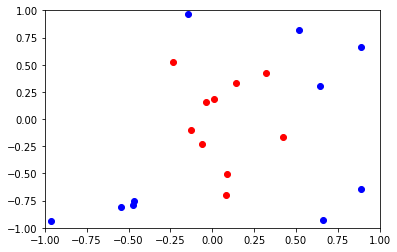

In [15]:
#Reading the data
fpath_csv2 = 'C:/Users/SAYAN/Desktop/ML1/csv2.csv'



#Reading
with open(fpath_csv2, 'r') as m:
    data2_read = m.read()
train_list2 = []
for i in data2_read.strip().split('\n'):
    j = i.split(',')
    train_list2.append(j)
data_csv2 = np.array(train_list2,dtype=np.float)
print(data_csv2)



#Plotting the data
for x, y, l in data_csv2:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(-1,1)
    plt.ylim(-1,1)

#Train a SVM classifier on the non linear data by appropriate features and also visualise it

In [16]:
#Creating feature extraction function
def feature_extract2(in_data):
    dat_extrac = in_data.copy()
    for i in range(len(dat_extrac)):
        dat_extrac[i][0] =(np.cos(dat_extrac[i][0]))
        dat_extrac[i][1] =np.cos(dat_extrac[i][1])
    return dat_extrac


#Doing feature extraction for csv2 dataset
data2_ex = feature_extract2(data_csv2)
data2_ex1 = np.concatenate((np.ones((data2_ex.shape[0],1)),data2_ex),axis=1)
X = data2_ex1[:,0:3]
Y = data2_ex1[:,3]



#train the dataset and find w
w = svm_function(X, Y,6000,0.01)
print("w is as follows",w)

w is as follows [[-5.03862812  2.21931504  3.98271423]]


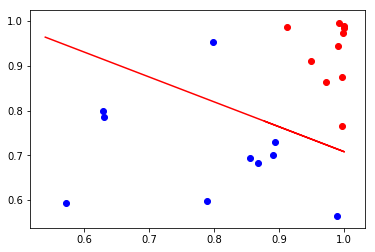

In [17]:
#visualisation
for x, y, l in data2_ex:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
z = np.arange(-1, 1, 0.5)
z = (np.cos(z))
plt.plot(z, -w[0,0]/w[0,2]-(w[0,1]/w[0,2])*z, 'r-')
plt.show()

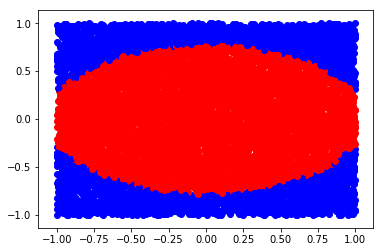

In [18]:
#Generating random data 
data_rand = np.array([[-1+2*np.random.rand(), -1+2*np.random.rand()] for i in range(1000)])
data1_rand1 = data_rand.copy()

#Feature extraction part
for i in range(len(data1_rand1)):
    data1_rand1[i][0] = (np.cos(data1_rand1[i][0]))
    data1_rand1[i][1] = np.cos(data1_rand1[i][1])

#Generating labels of the data
data1_rand1 = np.concatenate((np.ones((data1_rand1.shape[0],1)),data1_rand1),axis=1)
label_rand1 = np.dot(w,data1_rand1.T)
label_rand1 = np.multiply((np.dot(w,data1_rand1.T)>=0),1)

data1_rand2 = data1_rand1.copy()
for i, point in enumerate(data1_rand2):
    data1_rand2[i][0:2] = data_rand[i][0:2]
    data1_rand2[i][2] = label_rand1[0][i]
    
#plotting
for x, y, l in data1_rand2:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)

#Read the Random Non-linear data stored in CSV3

[[ 0.27180822  0.87921986 -1.        ]
 [ 0.55253327 -0.11938114  1.        ]
 [-0.29348482  0.13304465  1.        ]
 [-0.47743136 -0.10440862  1.        ]
 [-0.56450782  0.88042841 -1.        ]
 [ 0.57165557  0.93918664 -1.        ]
 [-0.99248621 -0.64471168 -1.        ]
 [ 0.90411295 -0.96383216 -1.        ]
 [ 0.6546998  -0.09231058  1.        ]
 [ 0.23191681  0.92029796 -1.        ]
 [ 0.83356734  0.13604458 -1.        ]
 [-0.02818634 -0.27761032  1.        ]
 [-0.45948482 -0.86406345 -1.        ]
 [ 0.39725769 -0.26911992  1.        ]
 [-0.19157897 -0.87510576 -1.        ]
 [ 0.36642413  0.58990836  1.        ]
 [ 0.53359687  0.11794347  1.        ]
 [-0.62508652  0.46588156 -1.        ]
 [ 0.61116503  0.90454096 -1.        ]
 [-0.89167122 -0.05126186 -1.        ]
 [-0.58181755 -0.73488455 -1.        ]
 [-0.78596212  0.04355831 -1.        ]
 [ 0.85585353 -0.61877426 -1.        ]
 [-0.37375469  0.67671271 -1.        ]
 [ 0.24725572 -0.77174041 -1.        ]
 [-0.94759601  0.09148164

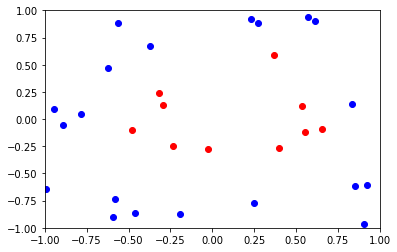

In [19]:
#Reading the file
fpath_csv3 = 'C:/Users/SAYAN/Desktop/ML1/csv3.csv'

with open(fpath_csv3, 'r') as m:
    data3_read = m.read()
train_list3 = []
for i in data3_read.strip().split('\n'):
    j = i.split(',')
    train_list3.append(j)
data_csv3 = np.array(train_list3,dtype=np.float)
print(data_csv3)

#plotting te graph
for x, y, l in data_csv3:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(-1,1)
    plt.ylim(-1,1)

#Train a SVM classifier on the non linear data by appropriate Feature Engineering and also visualise it

In [20]:
def svm_function1(x, y, epoch,lambd):
    w=np.zeros((1,4))
    for i in range(epoch):
        l_rate=1/(lambd*(i+1))
        for j in range(len(y)):
            if (y[j]*np.dot(w,x[j].reshape((1,4)).T))<=1:
                w=w*(1-1/(i+1))+l_rate*y[j]*x[j].reshape((1,4));
            else:
                w=w*(1-1/(i+1))
                
    return w

In [21]:
#feature extraction part

def feature_extract3(in_data):
    dat_extrac = np.zeros((in_data.shape[0],in_data.shape[1]+1))
    for i in range(len(dat_extrac)):
        dat_extrac[i][0] = np.square(in_data[i][0])
        dat_extrac[i][1] = np.square(in_data[i][1])
        dat_extrac[i][2] = (in_data[i][0]*in_data[i][1])
        dat_extrac[i][3] = (in_data[i][2])
    return dat_extrac

data3_ex = feature_extract3(data_csv3)
data3_ex1 = np.concatenate((np.ones((data3_ex.shape[0],1)),data3_ex),axis=1)
X = data3_ex1[:,:4]
Y = data3_ex1[:,4]

w = svm_function1(X, Y, 1000, 0.001)
print("w is as follows:",w)


w is as follows: [[ 4.4743968 -9.3969421 -7.9324915  2.3012629]]


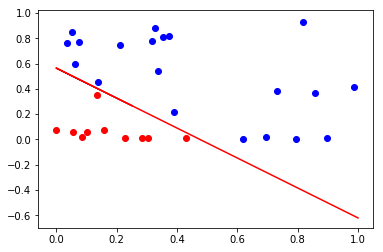

In [22]:
#visualise in new feature space:

for x, y,_,l in data3_ex:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
z = np.arange(-1, 1, 0.5)
z = np.square(z)
plt.plot(z, -w[0][0]/w[0][2] -w[0][1]/w[0][2]*z, 'r-')     
plt.show()

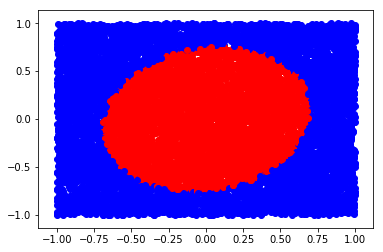

In [23]:
#Data visualization of nonlinear type in x1,x2 space:

#generate random data
data_random = np.array([[-1+2*np.random.rand(), -1+2*np.random.rand()] for i in range(1000)])
data3_random1 = np.zeros((data_random.shape[0],data_random.shape[1]+1))

#feature extraction
for i in range(len(data_random)):
    data3_random1[i][0] = np.square(data_random[i][0])
    data3_random1[i][1] = np.square(data_random[i][1])
    data3_random1[i][2] = data_random[i][0]*data_random[i][1]
    
    
#finding the labels
data3_random1 = np.concatenate((np.ones((data3_random1.shape[0],1)),data3_random1),axis=1)
label_random1 = np.dot(w,data3_random1.T)
label_random1 = np.multiply((np.dot(w,data3_random1.T)>=0),1)
data3_random2 = np.zeros((data_random.shape[0],data_random.shape[1]+1))

for i, point in enumerate(data3_random2):
    data3_random2[i][0:2] = data_random[i][0:2]
    data3_random2[i][2] = label_random1[0][i]
    
#plotting
for x, y, l in data3_random2:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)